In [48]:
import numpy as np
import pandas as pd
import requests
import wptools
import json
import re
import os
from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
sns.set()

## Gathering the Data

In [49]:
tw = pd.read_csv('twitter-archive-enhanced.csv')

In [50]:
tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [51]:
tw[tw.rating_denominator!=10].sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1120  731156023742988288                    NaN                  NaN   
1254  710658690886586372                    NaN                  NaN   
1433  697463031882764288                    NaN                  NaN   
1068  740373189193256964                    NaN                  NaN   
1598  686035780142297088           6.860340e+17         4.196984e+09   

                      timestamp  \
1120  2016-05-13 16:15:54 +0000   
1254  2016-03-18 02:46:49 +0000   
1433  2016-02-10 16:51:59 +0000   
1068  2016-06-08 02:41:38 +0000   
1598  2016-01-10 04:04:10 +0000   

                                                 source  \
1120  <a href="http://twitter.com/download/iphone" r...   
1254  <a href="http://twitter.com/download/iphone" r...   
1433  <a href="http://twitter.com/download/iphone" r...   
1068  <a href="http://twitter.com/download/iphone" r...   
1598  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1120  Say hello to this unbelievably well behaved sq...                  NaN   
1254  Here's a brigade of puppers. All look very pre...                  NaN   
1433  Happy Wednesday here's a bucket of pups. 44/40...                  NaN   
1068  After so many requests, this is Bretagne. She ...                  NaN   
1598  Yes I do realize a rating of 4/20 would've bee...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1120                       NaN                        NaN   
1254                       NaN                        NaN   
1433                       NaN                        NaN   
1068                       NaN                        NaN   
1598                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1120  https://twitter.com/dog_rates/status/731156023...               204   
1254  https://twitter.com/dog_rates/status/710658690...                80   
1433  https://twitter.com/dog_rates/status/697463031...                44   
1068  https://twitter.com/dog_rates/status/740373189...                 9   
1598                                                NaN                 4   

      rating_denominator  name doggo floofer pupper puppo  
1120                 170  this  None    None   None  None  
1254                  80  None  None    None   None  None  
1433                  40  None  None    None   None  None  
1068                  11  None  None    None   None  None  
1598                  20  None  None    None   None  None

### Gathering Images data from URL

In [52]:
imgs = pd.read_csv('image-predictions.tsv', sep= '\t')

In [53]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

response = requests.get(url)

with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

imgs = pd.read_csv('image-predictions.tsv', sep='\t')

In [54]:
imgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Gathering the Twitter like and retweet data with Tweepy api

In [55]:
#Tweepy api info
import tweepy

#consumer_key = XXXX
#consumer_secret = XXXX

#access_token = XXXX
#access_token_secret = XXXX

#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_token_secret)

#api = tweepy.API(auth)

#public_tweets = api.search('XYZ')

#for tweet in public tweets:

In [56]:
#tweet_api_pulls = {}
#for tweet in tweetids:
#    try:
#        tweet_data = api.get_status(tweet, wait_on_rate_limit = True)
#        tweet_api_pulls[str(tweet)] = tweet_data._json
#    except:
#        print('error on {}' .format(tweet))        

In [57]:
#import json
#with open('tweet_json.txt', 'w') as outfile:
#    json.dump(tweet_api_pulls, outfile)

In [58]:
#Testing to see if it works
with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweetid in data:
        print(tweetid)
        print(data[tweetid]['retweet_count'])
        print(data[tweetid]['favorite_count'])
        break

892420643555336193
8792
39360


In [59]:
tweetdf = []

with open('tweet_json.txt') as json_file:
    data = json.load(json_file)
    for tweetid in data:
        favorites = data[tweetid]['favorite_count']
        retweets = data[tweetid]['retweet_count']
        tweetdf.append({'tweet_id' : tweetid,
                       'retweets' : retweets,
                       'favorites': favorites})

tweetdf = pd.DataFrame(tweetdf)

In [60]:
#adding columns because without specifying columns the order is different and tweet_id is the last column
tweet_df = pd.DataFrame(tweetdf, columns = ['tweet_id', 'retweets', 'favorites'])

In [61]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 3 columns):
tweet_id     2115 non-null object
retweets     2115 non-null int64
favorites    2115 non-null int64
dtypes: int64(2), object(1)
memory usage: 49.6+ KB


# Assess

### Quality Issues
#### Twitter Archive Table
- Timestamp needs to be formatted correctly                  
- Data also includes (RT) Retweet data for 181 items that need to be removed and in their own table
- Missing 59 expanded_urls (2297 vs 2356 total)
- Rating Denominator has values other than 10 (2333 counts of 10) extract from text, look for date errors
- Missing doggo, fluffer, pupper data. Need to be extracted from text
- Drop retweeted_status_id, retweeted_status_user_id, and retweeted_status_timestamp
- Dog names are incorrect and have random words at times
- Putting hashtags in their own column, used a lot for marketing and should be helpful

### Tidiness Issues
#### Twitter Archive Table
- Retweets of 181 items that need to be in their own table
- Contains 78 replies (in_reply_to_user_id) need to be on their own table
- Doggo, Fluffer, and Pupper are not fields

# Clean

## Define:
- Timestamp needs to be in date time format so it can be queried easily (Twitter Archive Table)

##### Code:

In [62]:
#Note how timestamp is dtype object
tw_clean = tw.copy()
tw_clean.timestamp.sample(1)

334    2017-02-17 20:05:43 +0000
Name: timestamp, dtype: object

In [63]:
#Changing timestamp format to date and time format with to_datetime function
tw_clean['timestamp'] = pd.to_datetime(tw_clean.timestamp)

##### Test:

In [64]:
#Note how now its datetime64 type 
tw_clean.timestamp.sample(1)

1742   2015-12-23 00:45:35
Name: timestamp, dtype: datetime64[ns]

##### Define:
- Data also includes (RT) Retweet data for 181 items need to be in their own table (Tidiness)
- Contains 78 replies (in_reply_to_user_id) need to be in their own table (Tidiness)

##### Code:

In [65]:
tw_retweets = tw_clean[tw_clean['text'].str.contains('RT @')]

In [66]:
tw_retweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181 entries, 19 to 2260
Data columns (total 17 columns):
tweet_id                      181 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     181 non-null datetime64[ns]
source                        181 non-null object
text                          181 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 180 non-null object
rating_numerator              181 non-null int64
rating_denominator            181 non-null int64
name                          181 non-null object
doggo                         181 non-null object
floofer                       181 non-null object
pupper                        181 non-null object
puppo                         181 non-null object
dtypes: datetime64[ns](1), float64(4),

In [67]:
#Looking at the tw_retweets
tw_retweets.sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
911  757597904299253760                    NaN                  NaN   
399  824796380199809024                    NaN                  NaN   
386  826615380357632002                    NaN                  NaN   
618  796177847564038144                    NaN                  NaN   
266  841833993020538882                    NaN                  NaN   

              timestamp                                             source  \
911 2016-07-25 15:26:30  <a href="http://twitter.com/download/iphone" r...   
399 2017-01-27 01:49:15  <a href="http://twitter.com/download/iphone" r...   
386 2017-02-01 02:17:19  <a href="http://twitter.com/download/iphone" r...   
618 2016-11-09 02:29:25  <a href="http://twitter.com/download/iphone" r...   
266 2017-03-15 02:10:39  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
911  RT @jon_hill987: @dog_rates There is a cunning...         7.575971e+17   
399  RT @dog_rates: This is Bailey. She loves going...         7.950767e+17   
386  RT @dog_rates: Please only send in dogs. We on...         8.099208e+17   
618  RT @dog_rates: This is Ruby. She just turned o...         7.961497e+17   
266  RT @dog_rates: This is Ken. His cheeks are mag...         8.174239e+17   

     retweeted_status_user_id retweeted_status_timestamp  \
911              2.804798e+08  2016-07-25 15:23:28 +0000   
399              4.196984e+09  2016-11-06 01:33:58 +0000   
386              4.196984e+09  2016-12-17 00:38:52 +0000   
618              4.196984e+09  2016-11-09 00:37:46 +0000   
266              4.196984e+09  2017-01-06 17:33:29 +0000   

                                         expanded_urls  rating_numerator  \
911  https://twitter.com/jon_hill987/status/7575971...                11   
399  https://twitter.com/dog_rates/status/795076730...                11   
386  https://twitter.com/dog_rates/status/809920764...                10   
618  https://twitter.com/dog_rates/status/796149749...                11   
266  https://twitter.com/dog_rates/status/817423860...                13   

     rating_denominator    name doggo floofer  pupper puppo  
911                  10    None  None    None  pupper  None  
399                  10  Bailey  None    None    None  None  
386                  10    None  None    None    None  None  
618                  10    Ruby  None    None    None  None  
266                  10     Ken  None    None    None  None

In [68]:
tw_clean.drop(tw_clean[tw_clean['text'].str.contains('RT @')].index, inplace=True)

##### Test:

In [69]:
#Note how there are no more strings with RT @ in them
tw_clean[tw_clean['text'].str.contains('RT @')]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

## Define:
- Missing 59 expanded_urls (2297 vs 2356 total) (Twitter Archive Table)

##### Code:

In [70]:
#Looks like these are replies, so this is a good way to filter them out
tw_clean[tw_clean.expanded_urls.isnull()].count()

tweet_id                      58
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     58
source                        58
text                          58
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                  0
rating_numerator              58
rating_denominator            58
name                          58
doggo                         58
floofer                       58
pupper                        58
puppo                         58
dtype: int64

In [71]:
#There are 78 replies, 23 of them have expanded urls
tw_clean[(tw_clean.in_reply_to_status_id.notnull())].count()

tweet_id                      78
in_reply_to_status_id         78
in_reply_to_user_id           78
timestamp                     78
source                        78
text                          78
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 23
rating_numerator              78
rating_denominator            78
name                          78
doggo                         78
floofer                       78
pupper                        78
puppo                         78
dtype: int64

In [72]:
#So if the reply status is not null and expanded url is null then its a reply comment to someone elses post
#We can put these items on a different table because it does not involve one of their pictures or original posts.
tw_clean[(tw_clean.in_reply_to_status_id.notnull()) & (tw_clean.expanded_urls.isnull())].sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
274   840698636975636481           8.406983e+17         8.405479e+17   
967   750381685133418496           7.501805e+17         4.717297e+09   
611   797165961484890113           7.971238e+17         2.916630e+07   
1474  693644216740769793           6.936422e+17         4.196984e+09   
1940  673716320723169284           6.737159e+17         4.196984e+09   

               timestamp                                             source  \
274  2017-03-11 22:59:09  <a href="http://twitter.com/download/iphone" r...   
967  2016-07-05 17:31:49  <a href="http://twitter.com/download/iphone" r...   
611  2016-11-11 19:55:50  <a href="http://twitter.com/download/iphone" r...   
1474 2016-01-31 03:57:23  <a href="http://twitter.com/download/iphone" r...   
1940 2015-12-07 04:11:02  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
274   @0_kelvin_0 &gt;10/10 is reserved for puppos s...                  NaN   
967                13/10 such a good doggo\n@spaghemily                  NaN   
611   @JODYHiGHROLLER it may be an 11/10 but what do...                  NaN   
1474  BREAKING PUPDATE: I've just been notified that...                  NaN   
1940  The millennials have spoken and we've decided ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
274                        NaN                        NaN           NaN   
967                        NaN                        NaN           NaN   
611                        NaN                        NaN           NaN   
1474                       NaN                        NaN           NaN   
1940                       NaN                        NaN           NaN   

      rating_numerator  rating_denominator  name  doggo floofer pupper puppo  
274                 10                  10  None   None    None   None  None  
967                 13                  10  None  doggo    None   None  None  
611                 11                  10  None   None    None   None  None  
1474                10                  10  None   None    None   None  None  
1940                 1                  10  None   None    None   None  None

In [73]:
tw_clean[(tw_clean.in_reply_to_status_id.notnull()) & (tw_clean.expanded_urls.isnull())].count()

tweet_id                      55
in_reply_to_status_id         55
in_reply_to_user_id           55
timestamp                     55
source                        55
text                          55
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                  0
rating_numerator              55
rating_denominator            55
name                          55
doggo                         55
floofer                       55
pupper                        55
puppo                         55
dtype: int64

In [74]:
tw_replies = tw_clean[(tw_clean.in_reply_to_status_id.notnull()) & (tw_clean.expanded_urls.isnull())]

In [75]:
tw_clean.drop(tw_clean[(tw_clean.in_reply_to_status_id.notnull()) & (tw_clean.expanded_urls.isnull())].index, inplace=True)

In [76]:
tw_clean[(tw_clean.in_reply_to_status_id.notnull()) & (tw_clean.expanded_urls.isnull())].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [77]:
#If the reply status is not null & there is an expanded url, then its a reply to one of their own tweets
#These have the same charcteristics of a new post except its relevant to a previous post so will keep it in the table
tw_clean[(tw_clean.in_reply_to_status_id.notnull()) & (tw_clean.expanded_urls.notnull())].sample(5)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1852  675707330206547968           6.754971e+17         4.196984e+09   
1356  703425003149250560           7.030419e+17         4.196984e+09   
1016  746906459439529985           7.468859e+17         4.196984e+09   
1464  694356675654983680           6.706684e+17         4.196984e+09   
565   802265048156610565           7.331095e+17         4.196984e+09   

               timestamp                                             source  \
1852 2015-12-12 16:02:36  <a href="http://twitter.com/download/iphone" r...   
1356 2016-02-27 03:42:44  <a href="http://twitter.com/download/iphone" r...   
1016 2016-06-26 03:22:31  <a href="http://twitter.com/download/iphone" r...   
1464 2016-02-02 03:08:26  <a href="http://twitter.com/download/iphone" r...   
565  2016-11-25 21:37:47  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1852  We've got ourselves a battle here. Watch out R...                  NaN   
1356  Really guys? Again? I know this is a rare Alba...                  NaN   
1016  PUPDATE: can't see any. Even if I could, I cou...                  NaN   
1464  This pupper only appears through the hole of a...                  NaN   
565   Like doggo, like pupper version 2. Both 11/10 ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1852                       NaN                        NaN   
1356                       NaN                        NaN   
1016                       NaN                        NaN   
1464                       NaN                        NaN   
565                        NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1852  https://twitter.com/dog_rates/status/675707330...                11   
1356  https://twitter.com/dog_rates/status/703425003...                 9   
1016  https://twitter.com/dog_rates/status/746906459...                 0   
1464  https://twitter.com/dog_rates/status/694356675...                10   
565   https://twitter.com/dog_rates/status/802265048...                11   

      rating_denominator  name  doggo floofer  pupper puppo  
1852                  10  None   None    None    None  None  
1356                  10  None   None    None    None  None  
1016                  10  None   None    None    None  None  
1464                  10  None   None    None  pupper  None  
565                   10  None  doggo    None  pupper  None

In [78]:
#We still have 3 items with missing expanded URLS, and this is because they don't have picutres
tw_clean[tw_clean.expanded_urls.isnull()]

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
375   828361771580813312                    NaN                  NaN   
707   785515384317313025                    NaN                  NaN   
1445  696518437233913856                    NaN                  NaN   

               timestamp                                             source  \
375  2017-02-05 21:56:51  <a href="http://twitter.com" rel="nofollow">Tw...   
707  2016-10-10 16:20:36  <a href="http://twitter.com/download/iphone" r...   
1445 2016-02-08 02:18:30  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
375   Beebop and Doobert should start a band 12/10 w...                  NaN   
707      Today, 10/10, should be National Dog Rates Day                  NaN   
1445    Oh my god 10/10 for every little hot dog pupper                  NaN   

      retweeted_status_user_id retweeted_status_timestamp expanded_urls  \
375                        NaN                        NaN           NaN   
707                        NaN                        NaN           NaN   
1445                       NaN                        NaN           NaN   

      rating_numerator  rating_denominator  name doggo floofer  pupper puppo  
375                 12                  10  None  None    None    None  None  
707                 10                  10  None  None    None    None  None  
1445                10                  10  None  None    None  pupper  None

In [79]:
tw_clean.drop(tw_clean[tw_clean.expanded_urls.isnull()].index, inplace=True)

In [80]:
tw_clean = tw_clean.reset_index(drop=True)

##### Test:

In [81]:
tw_clean[tw_clean.expanded_urls.isnull()]

Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

In [82]:
#We see 23 in reply to status, but they are replies with new pictures and relevent.
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), flo

## Define:
Rating Denominator has values other than 10 (2333 counts of 10) extract from text, look for pup(s), pupper(s) and date errors

In [83]:
#Most of these are for multiple puppy ratings, but a few like the 24/7, 4/20, and 7/11 items are errors that need to be updated
#setting option to -1 to show all of the text
pd.set_option('display.max_colwidth', -1)
tw_clean[tw_clean.rating_denominator != 10][['text','rating_numerator','rating_denominator']]

text  \
341   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                         
405   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx   
702   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                                              
857   After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                                
908   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                                                   
953   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                                            
990   This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                                       
1016  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                                               
1041  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                                                
1061  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK                          
1136  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                                          
1218  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                                                
1410  Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3                                              
1411  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55                                
1438  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5                                 
1552  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                                                      
1615  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                                                 
2096  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                    

      rating_numerator  rating_denominator  
341   84                70                  
405   24                7                   
702   165               150                 
857   9                 11                  
908   204               170                 
953   4                 20                  
990   50                50                  
1016  99                90                  
1041  80                80                  
1061  45                50                  
1136  60                50                  
1218  44                40                  
1410  143               130                 
1411  121               110                 
1438  7                 11                  
1552  144               120                 
1615

In [84]:
#We can the second item is NaN because they do not rate it
#The last row is also NaN because they rate it 9/10 which is out of the ordinary since they always rate dogs 10/10 or higher
tw_clean[tw_clean.rating_denominator != 10].text.str.extract('(\d{2,3}/\d{2,3})', expand=False).str.split('/')

341     [84, 70]  
405     NaN       
702     [165, 150]
857     [14, 10]  
908     [204, 170]
953     [13, 10]  
990     [50, 50]  
1016    [99, 90]  
1041    [80, 80]  
1061    [45, 50]  
1136    [60, 50]  
1218    [44, 40]  
1410    [143, 130]
1411    [121, 110]
1438    [10, 10]  
1552    [144, 120]
1615    [88, 80]  
2096    NaN       
Name: text, dtype: object

In [85]:
tw_clean.drop(tw_clean.index[[405, 2096]],inplace=True)

In [86]:
tw_clean[tw_clean.rating_denominator != 10].text.str.extract('(\d{2,3}/\d{2,3})', expand=False).str.split('/')

341     [84, 70]  
702     [165, 150]
857     [14, 10]  
908     [204, 170]
953     [13, 10]  
990     [50, 50]  
1016    [99, 90]  
1041    [80, 80]  
1061    [45, 50]  
1136    [60, 50]  
1218    [44, 40]  
1410    [143, 130]
1411    [121, 110]
1438    [10, 10]  
1552    [144, 120]
1615    [88, 80]  
Name: text, dtype: object

In [87]:
#Setting the raing on the remaining items without denominators of 10 to be the correct number
tw_clean.set_value(tw_clean[tw_clean.rating_denominator != 10].index, 'rating_numerator', tw_clean[tw_clean.rating_denominator != 10].text.str.extract('(\d{2,3}/\d{2,3})', expand=False).str.split('/').str[0])
tw_clean.set_value(tw_clean[tw_clean.rating_denominator != 10].index, 'rating_denominator', tw_clean[tw_clean.rating_denominator != 10].text.str.extract('(\d{2,3}/\d{2,3})', expand=False).str.split('/').str[1])

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
19    888078434458587136 NaN                    NaN                    
20    887705289381826560 NaN                    NaN                    
21    887517139158093824 NaN                    NaN                    
22    887473957103951883 NaN                    NaN                    
23    887343217045368832 NaN                    NaN                    
24    887101392804085760 NaN                    NaN                    
25    886983233522544640 NaN                    NaN                    
26    886736880519319552 NaN                    NaN                    
27    886680336477933568 NaN                    NaN                    
28    886366144734445568 NaN                    NaN                    
29    886258384151887873 NaN                    NaN                    
...                  ...  ..                     ..                    
2086  666418789513326592 NaN                    NaN                    
2087  666411507551481857 NaN                    NaN                    
2088  666407126856765440 NaN                    NaN                    
2089  666396247373291520 NaN                    NaN                    
2090  666373753744588802 NaN                    NaN                    
2091  666362758909284353 NaN                    NaN                    
2092  666353288456101888 NaN                    NaN                    
2093  666345417576210432 NaN                    NaN                    
2094  666337882303524864 NaN                    NaN                    
2095  666293911632134144 NaN                    NaN                    
2097  666273097616637952 NaN                    NaN                    
2098  666268910803644416 NaN                    NaN                    
2099  666104133288665088 NaN                    NaN                    
2100  666102155909144576 NaN                    NaN                    
2101  666099513787052032 NaN                    NaN                    
2102  666094000022159362 NaN                    NaN                    
2103  666082916733198337 NaN                    NaN                    
2104  666073100786774016 NaN                    NaN                    
2105  666071193221509120 NaN                    NaN                    
2106  666063827256086533 NaN                    NaN                    
2107  666058600524156928 NaN                    NaN                    
2108  666057090499244032 NaN                    NaN                    
2109  666055525042405380 NaN                    NaN                    
2110  666051853826850816 NaN                    NaN     

##### Test

In [88]:
#We can see that 9/11, 4/20, and 7/11 are no longer used as the numerator or denominator
tw_clean[tw_clean.rating_denominator != 10][['text','rating_numerator','rating_denominator']]

text  \
341   The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                  
702   Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                                                                       
857   After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ         
908   Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv                            
953   Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a                                                                                     
990   This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq                                
1016  Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1                                                        
1041  Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12                                         
1061  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK   
1136  Here is a whole flock of puppers.  60/50 I'll take the lot https://t.co/9dpcw6MdWa                                                                   
1218  Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ                                                         
1410  Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3                       
1411  Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55         
1438  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5          
1552  IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq                                                                               
1615  Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw                                          

     rating_numerator rating_denominator  
341   84               70                 
702   165              150                
857   14               10                 
908   204              170                
953   13               10                 
990   50               50                 
1016  99               90                 
1041  80               80                 
1061  45               50                 
1136  60               50                 
1218  44               40                 
1410  143              130                
1411  121              110                
1438  10               10                 
1552  144              120                
1615  88               80

In [89]:
tw_clean[tw_clean.rating_denominator != 10].loc[:,('rating_numerator','rating_denominator')]

rating_numerator rating_denominator
341   84               70               
702   165              150              
857   14               10               
908   204              170              
953   13               10               
990   50               50               
1016  99               90               
1041  80               80               
1061  45               50               
1136  60               50               
1218  44               40               
1410  143              130              
1411  121              110              
1438  10               10               
1552  144              120              
1615  88               80

## Define
Missing doggo, pupper, puppo info extract from text

In [90]:
tw_unknown = tw_clean[(tw_clean.doggo == 'None') & (tw_clean.pupper == 'None') & (tw_clean.puppo == 'None')]

In [91]:
tw_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      1786 non-null int64
in_reply_to_status_id         20 non-null float64
in_reply_to_user_id           20 non-null float64
timestamp                     1786 non-null datetime64[ns]
source                        1786 non-null object
text                          1786 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1786 non-null object
rating_numerator              1786 non-null object
rating_denominator            1786 non-null object
name                          1786 non-null object
doggo                         1786 non-null object
floofer                       1786 non-null object
pupper                        1786 non-null object
puppo                         1786 non-null object
dtypes: datetime64[ns](1), f

#### Code

In [92]:
tw_known = tw_unknown[(tw_unknown.text.str.contains('doggo')) | (tw_unknown.text.str.contains('pupper')) | (tw_unknown.text.str.contains('puppo'))]

In [93]:
tw_known.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 50 to 1907
Data columns (total 17 columns):
tweet_id                      37 non-null int64
in_reply_to_status_id         1 non-null float64
in_reply_to_user_id           1 non-null float64
timestamp                     37 non-null datetime64[ns]
source                        37 non-null object
text                          37 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 37 non-null object
rating_numerator              37 non-null object
rating_denominator            37 non-null object
name                          37 non-null object
doggo                         37 non-null object
floofer                       37 non-null object
pupper                        37 non-null object
puppo                         37 non-null object
dtypes: datetime64[ns](1), float64(4), int64(1), object

In [94]:
doggo = tw_known.loc[tw_known.text.str.contains('doggo')].index

In [95]:
pupper = tw_known.loc[tw_known.text.str.contains('pupper')].index

In [96]:
puppo = tw_known.loc[tw_known.text.str.contains('puppo')].index

In [97]:
tw_clean.doggo.loc[doggo] = 'doggo'

C:\Users\musta\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [98]:
tw_clean.pupper.loc[pupper] = 'pupper'

C:\Users\musta\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [99]:
tw_clean.puppo.loc[puppo] = 'puppo'

C:\Users\musta\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


#### Test

In [100]:
#We can see below that now the unknown items went from 1786 to 1749
#This is a difference of 37, which is our known dataframe of unkown items that actually had the type of dog name in the text
tw_unknown = tw_clean[(tw_clean.doggo == 'None') & (tw_clean.pupper == 'None') & (tw_clean.puppo == 'None')]
tw_unknown.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      1749 non-null int64
in_reply_to_status_id         19 non-null float64
in_reply_to_user_id           19 non-null float64
timestamp                     1749 non-null datetime64[ns]
source                        1749 non-null object
text                          1749 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1749 non-null object
rating_numerator              1749 non-null object
rating_denominator            1749 non-null object
name                          1749 non-null object
doggo                         1749 non-null object
floofer                       1749 non-null object
pupper                        1749 non-null object
puppo                         1749 non-null object
dtypes: datetime64[ns](1), f

## Define:
- Removing the unecessary columns, retweeted_status_id, retweeted_user_id, and retweeted_status_timestamp

In [101]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2116
Data columns (total 17 columns):
tweet_id                      2115 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2115 non-null datetime64[ns]
source                        2115 non-null object
text                          2115 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2115 non-null object
rating_numerator              2115 non-null object
rating_denominator            2115 non-null object
name                          2115 non-null object
doggo                         2115 non-null object
floofer                       2115 non-null object
pupper                        2115 non-null object
puppo                         2115 non-null object
dtypes: datetime64[ns](1), f

#### Code

In [102]:
tw_clean = tw_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)
tw_clean.reset_index(drop=True)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193 NaN                    NaN                    
1     892177421306343426 NaN                    NaN                    
2     891815181378084864 NaN                    NaN                    
3     891689557279858688 NaN                    NaN                    
4     891327558926688256 NaN                    NaN                    
5     891087950875897856 NaN                    NaN                    
6     890971913173991426 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
8     890609185150312448 NaN                    NaN                    
9     890240255349198849 NaN                    NaN                    
10    890006608113172480 NaN                    NaN                    
11    889880896479866881 NaN                    NaN                    
12    889665388333682689 NaN                    NaN                    
13    889638837579907072 NaN                    NaN                    
14    889531135344209921 NaN                    NaN                    
15    889278841981685760 NaN                    NaN                    
16    888917238123831296 NaN                    NaN                    
17    888804989199671297 NaN                    NaN                    
18    888554962724278272 NaN                    NaN                    
19    888078434458587136 NaN                    NaN                    
20    887705289381826560 NaN                    NaN                    
21    887517139158093824 NaN                    NaN                    
22    887473957103951883 NaN                    NaN                    
23    887343217045368832 NaN                    NaN                    
24    887101392804085760 NaN                    NaN                    
25    886983233522544640 NaN                    NaN                    
26    886736880519319552 NaN                    NaN                    
27    886680336477933568 NaN                    NaN                    
28    886366144734445568 NaN                    NaN                    
29    886258384151887873 NaN                    NaN                    
...                  ...  ..                     ..                    
2085  666418789513326592 NaN                    NaN                    
2086  666411507551481857 NaN                    NaN                    
2087  666407126856765440 NaN                    NaN                    
2088  666396247373291520 NaN                    NaN                    
2089  666373753744588802 NaN                    NaN                    
2090  666362758909284353 NaN                    NaN                    
2091  666353288456101888 NaN                    NaN                    
2092  666345417576210432 NaN                    NaN                    
2093  666337882303524864 NaN                    NaN                    
2094  666293911632134144 NaN                    NaN                    
2095  666273097616637952 NaN                    NaN                    
2096  666268910803644416 NaN                    NaN                    
2097  666104133288665088 NaN                    NaN                    
2098  666102155909144576 NaN                    NaN                    
2099  666099513787052032 NaN                    NaN                    
2100  666094000022159362 NaN                    NaN                    
2101  666082916733198337 NaN                    NaN                    
2102  666073100786774016 NaN                    NaN                    
2103  666071193221509120 NaN                    NaN                    
2104  666063827256086533 NaN                    NaN                    
2105  666058600524156928 NaN                    NaN                    
2106  666057090499244032 NaN                    NaN                    
2107  666055525042405380 NaN                    NaN                    
2108  666051853826850816 NaN                    NaN     

#### Test

In [103]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2115 entries, 0 to 2116
Data columns (total 14 columns):
tweet_id                 2115 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                2115 non-null datetime64[ns]
source                   2115 non-null object
text                     2115 non-null object
expanded_urls            2115 non-null object
rating_numerator         2115 non-null object
rating_denominator       2115 non-null object
name                     2115 non-null object
doggo                    2115 non-null object
floofer                  2115 non-null object
pupper                   2115 non-null object
puppo                    2115 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 327.9+ KB


## Define
Dog names are incorrect and have random words at times

In [104]:
#Using regular expressions to find names with lower case letters
bad_names = tw_clean[tw_clean['name'].str.contains('(^[a-z]\w{0,})')]

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [105]:
#We can see this gathers many of the incorrect names
bad_names['name'].value_counts()

a               55
the             8 
an              5 
one             4 
very            4 
just            3 
quite           3 
getting         2 
not             2 
actually        2 
by              1 
my              1 
space           1 
his             1 
old             1 
infuriating     1 
mad             1 
officially      1 
this            1 
light           1 
incredibly      1 
such            1 
life            1 
all             1 
unacceptable    1 
Name: name, dtype: int64

#### Code

In [106]:
bad_names_index = bad_names.index

In [107]:
for row in bad_names_index:
    tw_clean.at[row, 'name'] = ''

In [108]:
#Replacing all the names with lower case letters with '' instead
tw_clean[tw_clean['name'].str.contains('(^[a-z]\w{0,})')]

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

#### Test

In [109]:
#Can see there are no more names that begin with lower case letters
tw_clean[tw_clean['name'].str.contains('(^[a-z]\w{0,})', na=False)]

C:\Users\musta\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


Empty DataFrame
Columns: [tweet_id, in_reply_to_status_id, in_reply_to_user_id, timestamp, source, text, expanded_urls, rating_numerator, rating_denominator, name, doggo, floofer, pupper, puppo]
Index: []

## Define
- Hashtags should be parsed in their own category also because its used for sorting and marketing by others

#### Code

In [110]:
tw_clean['hashtags'] = tw_clean['text'].str.extract('\#(\w+)', expand=False)

#### Test

In [111]:
tw_clean[tw_clean.hashtags.notnull()].count()

tweet_id                 24
in_reply_to_status_id    0 
in_reply_to_user_id      0 
timestamp                24
source                   24
text                     24
expanded_urls            24
rating_numerator         24
rating_denominator       24
name                     24
doggo                    24
floofer                  24
pupper                   24
puppo                    24
hashtags                 24
dtype: int64

In [112]:
tw_clean.hashtags.value_counts()

BarkWeek                 9
PrideMonth               3
Canada150                1
dogsatpollingstations    1
NoDaysOff                1
FinalFur                 1
notallpuppers            1
PrideMonthPuppo          1
BellLetsTalk             1
WomensMarch              1
K9VeteransDay            1
ScienceMarch             1
ImWithThor               1
WKCDogShow               1
Name: hashtags, dtype: int64

It looks like the hashtags are mostly used during barkweek, and during holidays and events

WeRateDogs is popular but maybe if they used hashtags they'd increase their visibility. I looked on instagram, where hashtags are very popular, and there's a lack of hashtags there which I found very odd since the internet uses them for search.

## Define:
Doggo, Fluffer, and Pupper need to be on one column for tidiness

#### Code

In [113]:
tw_clean['dog_stage'] = tw_clean['doggo'].astype(str) + ', ' + tw_clean['pupper'].astype(str) + ', ' + tw_clean['puppo'].astype(str)

In [114]:
tw_clean['dog_stage'] = tw_clean['dog_stage'].str.replace('None, ', '')
tw_clean['dog_stage'] = tw_clean['dog_stage'].str.replace(', None', '')

In [115]:
tw_clean.dog_stage.value_counts()

None             1749
pupper           246 
doggo            81  
puppo            28  
doggo, pupper    10  
doggo, puppo     1   
Name: dog_stage, dtype: int64

In [116]:
tw_clean.drop(['doggo', 'pupper', 'puppo'], axis=1, inplace=True)

In [117]:
tw_clean.sample()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1381  685943807276412928 NaN                    NaN                    

               timestamp  \
1381 2016-01-09 21:58:42   

                                                                                  source  \
1381  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>   

                                                                                                                                              text  \
1381  This is the newly formed pupper a capella group. They're just starting out but I see tons of potential. 8/10 for all https://t.co/wbAcvFoNtn   

                                                        expanded_urls  \
1381  https://twitter.com/dog_rates/status/685943807276412928/video/1   

     rating_numerator rating_denominator name floofer hashtags dog_stage  
1381  8                10                      None    NaN      pupper

In [118]:
from matplotlib.dates import date2num

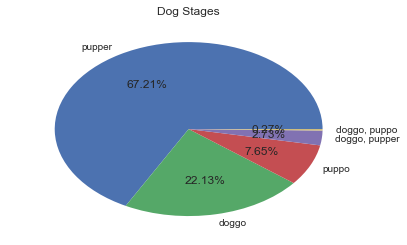

In [119]:
tw_clean.dog_stage[tw_clean.dog_stage !='None'].value_counts().plot(kind='pie', title='Dog Stages', autopct='%.2f%%')
plt.axis('off')
plt.savefig('dogstages.png', bbox_inches='tight')
plt.show()

Puppers are by far the most instagrammed dogs because puppies are more popular

Or maybe its just the most commonly used word to describe them dogs

In [120]:
tw_clean = pd.merge(tw_clean, imgs, how='inner', on='tweet_id')

In [121]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 24 columns):
tweet_id                 1992 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null object
rating_denominator       1992 non-null object
name                     1992 non-null object
floofer                  1992 non-null object
hashtags                 22 non-null object
dog_stage                1992 non-null object
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf           

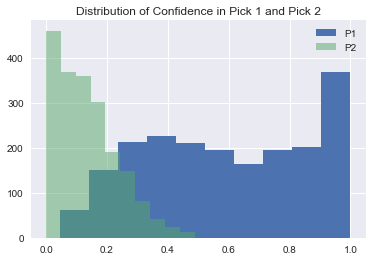

In [122]:
plt.hist(tw_clean.p1_conf, label='P1')
plt.hist(tw_clean.p2_conf, alpha=0.5, label='P2')
plt.title('Distribution of Confidence in Pick 1 and Pick 2')
plt.legend()
plt.savefig('images.png', bbox_inches='tight')
plt.show()

#### Now Merging the tweet api data info with the clean dataframe

In [123]:
tw_clean.tweet_id = tw_clean.tweet_id.astype(str)

In [124]:
tw_clean = pd.merge(tw_clean, tweet_df, how='inner', on='tweet_id')

In [125]:
tw_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1992 entries, 0 to 1991
Data columns (total 26 columns):
tweet_id                 1992 non-null object
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1992 non-null datetime64[ns]
source                   1992 non-null object
text                     1992 non-null object
expanded_urls            1992 non-null object
rating_numerator         1992 non-null object
rating_denominator       1992 non-null object
name                     1992 non-null object
floofer                  1992 non-null object
hashtags                 22 non-null object
dog_stage                1992 non-null object
jpg_url                  1992 non-null object
img_num                  1992 non-null int64
p1                       1992 non-null object
p1_conf                  1992 non-null float64
p1_dog                   1992 non-null bool
p2                       1992 non-null object
p2_conf          

In [126]:
np.corrcoef(tw_clean.retweets, tw_clean.favorites)

array([[ 1.        ,  0.91609214],
       [ 0.91609214,  1.        ]])

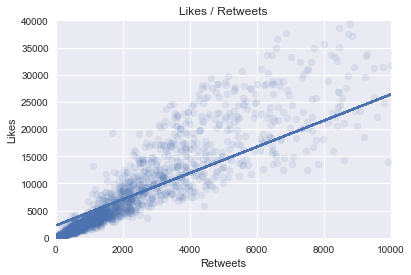

The slope, and thus more likely someone is to like vs retweet is 2.4109063749716344


In [127]:
#We can see a very strong correlation between retweets and favorites
plt.scatter(tw_clean.retweets, tw_clean.favorites, alpha=1/10)
plt.xlabel('Retweets')
plt.ylabel('Likes')
plt.title('Likes / Retweets')
plt.xlim([0, 10000])
plt.ylim([0, 40000])
m, b = np.polyfit(tw_clean.retweets, tw_clean.favorites, 1)
plt.plot(tw_clean.retweets, m*tw_clean.retweets + b, '-')

plt.savefig('likeretweet.png', bbox_inches='tight')

plt.show()
print('The slope, and thus more likely someone is to like vs retweet is {}' .format(m))

In [128]:
tw_favorites = tw_clean.sort_values(by=['favorites'], ascending=False)
tw_favorites

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
309   822872901745569793 NaN                    NaN                    
774   744234799360020481 NaN                    NaN                    
399   807106840509214720 NaN                    NaN                    
58    879415818425184262 NaN                    NaN                    
108   866450705531457537 NaN                    NaN                    
333   819004803107983360 NaN                    NaN                    
135   859196978902773760 NaN                    NaN                    
93    870374049280663552 NaN                    NaN                    
401   806629075125202948 NaN                    NaN                    
65    877736472329191424 NaN                    NaN                    
33    884925521741709313 NaN                    NaN                    
124   862096992088072192 NaN                    NaN                    
809   739238157791694849 NaN                    NaN                    
265   830583320585068544 NaN                    NaN                    
22    887473957103951883 NaN                    NaN                    
1481  676219687039057920 NaN                    NaN                    
7     890729181411237888 NaN                    NaN                    
100   868880397819494401 NaN                    NaN                    
1423  678399652199309312 NaN                    NaN                    
272   829011960981237760 NaN                    NaN                    
339   817827839487737858 NaN                    NaN                    
297   825535076884762624 NaN                    NaN                    
449   795464331001561088 NaN                    NaN                    
636   761672994376806400 NaN                    NaN                    
109   866334964761202691 NaN                    NaN                    
48    881666595344535552 NaN                    NaN                    
49    881536004380872706 NaN                    NaN                    
332   819006400881917954 NaN                    NaN                    
1931  667152164079423490 NaN                    NaN                    
410   804026241225523202 NaN                    NaN                    
...                  ...  ..                     ..                    
1881  667915453470232577 NaN                    NaN                    
1902  667538891197542400 NaN                    NaN                    
1851  668620235289837568 NaN                    NaN                    
1918  667393430834667520 NaN                    NaN                    
1970  666337882303524864 NaN                    NaN                    
1912  667455448082227200 NaN                    NaN                    
1925  667177989038297088 NaN                    NaN                    
1938  667044094246576128 NaN                    NaN                    
1966  666373753744588802 NaN                    NaN                    
1952  666691418707132416 NaN                    NaN                    
1972  666273097616637952 NaN                    NaN                    
1936  667065535570550784 NaN                    NaN                    
1958  666435652385423360 NaN                    NaN                    
1965  666396247373291520 NaN                    NaN                    
1960  666428276349472768 NaN                    NaN                    
1977  666094000022159362 NaN                    NaN                    
1976  666099513787052032 NaN                    NaN                    
1980  666071193221509120 NaN                    NaN                    
1986  666050758794694657 NaN                    NaN                    
1990  666029285002620928 NaN                    NaN                    
1957  666437273139982337 NaN                    NaN                    
1962  666418789513326592 NaN                    NaN                    
1989  666033412701032449 NaN                    NaN                    
1978  666082916733198337 NaN                    NaN     

# And here is our complete dataset with all the info

In [129]:
tw_clean.sample(10)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
563   775842724423557120 NaN                    NaN                    
1324  683098815881154561 NaN                    NaN                    
1885  667885044254572545 NaN                    NaN                    
917   717790033953034240 NaN                    NaN                    
1796  669625907762618368 NaN                    NaN                    
1462  676864501615042560 NaN                    NaN                    
1385  680085611152338944 NaN                    NaN                    
123   862457590147678208 NaN                    NaN                    
1946  666804364988780544 NaN                    NaN                    
1777  670069087419133954 NaN                    NaN                    

               timestamp  \
563  2016-09-13 23:44:54   
1324 2016-01-02 01:33:43   
1885 2015-11-21 01:59:37   
917  2016-04-06 19:04:14   
1796 2015-11-25 21:17:12   
1462 2015-12-15 20:40:47   
1385 2015-12-24 18:00:19   
123  2017-05-11 00:01:27   
1946 2015-11-18 02:25:23   
1777 2015-11-27 02:38:14   

                                                                                   source  \
563   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1324  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1885  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
917   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1796  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1462  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1385  <a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>   
123   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1946  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    
1777  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>    

                                                                                                                                                               text  \
563   This is Blue. He was having an average day until his owner told him about Bront. 12/10 h*ckin hysterical af https://t.co/saRYTcxQeH                             
1324  aahhhhkslaldhwnxmzbbs 12/10 for being da smooshiest https://t.co/UOPdXmUz4H                                                                                     
1885  Meet Stu. Stu has stacks on stacks and an eye made of pure gold. 10/10 pay for my tuition pls https://t.co/7rkYZQdKEd                                           
917   Here's a badass mystery pupper. You weren't aware that you owe him money, but you do. 10/10 shades sick af https://t.co/fv9e9AtzSG                              
1796  This is Penny. She's having fun AND being safe. 12/10 very responsible pup https://t.co/eqeWw67oU7                                                              
1462  Meet Ash. He's just a head now. Lost his body during the Third Crusade. Still in good spirits. 10/10 would pet well https://t.co/NJj2uP0atK                     
1385  This is by far the most coordinated series of pictures I was sent. Downright impressive in every way. 12/10 for all https://t.co/etzLo3sdZE                     
123   This is Jersey. He likes to watch movies, but only if you watch with him. Enjoys horror films like The Bababork and H*ckraiser. 13/10 https://t.co/jvSNASweNb   
1946  This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10 https://t.co/RdKbAOEpDK                         
1777  This is Randall. He's from Chernobyl. Built playground himself. Has been stuck up there quite a while. 5/10 good dog https://t.co/pzrvc7wKGd                    

                                                    

In [133]:
tw_clean.to_csv('WeRateDogs.csv', index=False)